<h1 style="color:purple">PRCP- 1001-Rice Leaf Disease Detection</h1>



<h1 style="color:purple">Business Case</h1>

This project aims to develop a disease classification model for rice plants to assist farmers in accurately identifying and managing leaf blast, bacterial blight, and brown spot diseases, thereby enhancing crop productivity and promoting sustainable agriculture practices

<h1 style="color:purple">Problem Statement</h1>


The objective of this project is to develop a model capable of accurately classifying the three major attacking diseases of rice plants: leaf blast, bacterial blight, and brown spot. Additionally, a comprehensive data analysis report on the provided dataset is required. 
Furthermore, the project aims to analyze and evaluate the effectiveness of various data augmentation techniques for improving the classification model's performance.

<h1 style="color:purple">Rice Leaf Disease Detection</h1>

For this project ,our approch is to detecting rice leaf disease by using CNN(convulation nnueral network),which are a type of deep learning algorithm that can learn to recognize patterns in images.
This dataset consist of 119jpg images. we provide 3 type of leaf to out model and model detect & serve result

Rice is important for several reasons, including its significance as a staple food, its nutritional value, its economic impact, its cultural importance, its environmental benefits, and its contribution to global food supply. Diseases such as bacterial leaf blight, brown spot, and leaf smut can have significant effects on rice production. Here's a closer look at how these diseases affect rice:

<h1 style="color:purple">Name Of Rice Leaf Disease & Why Its Cuases</h1>

<h3 style="color:purple">Bacterial Leaf Blight:</h3>

Bacterial leaf blight, caused by the bacteria Xanthomonas oryzae pv. oryzae, affects rice plants.
The disease spreads through infected seeds, wind, rain splashes, or irrigation water.
Bacterial leaf blight causes water-soaked lesions on leaves that turn yellow and eventually brown.
Infected leaves may have streaks or lesions that coalesce, leading to leaf withering and reduced photosynthesis.
Severe infections can cause yield losses and affect the quality of rice grains.
To manage bacterial leaf blight, farmers can use disease-resistant rice varieties, practice crop rotation, adopt proper irrigation techniques, and apply copper-based or antibiotic sprays when necessary.

<h3 style="color:purple">Brown Spot:</h3>

Brown spot, caused by the fungus Bipolaris oryzae, is a common rice disease.
The fungus thrives in warm and humid conditions.
Brown spot manifests as small, oval to spindle-shaped, brown lesions with yellowish halos on rice leaves.
Severe infections can cause leaf withering, premature leaf death, and reduced photosynthesis.
The disease can lead to yield losses and impact rice quality.
Farmers can manage brown spot by planting resistant rice varieties, practicing field sanitation, avoiding excessive nitrogen fertilization, and applying fungicides if necessary.

<h3 style="color:purple">Leaf Smut:</h3>

Leaf smut, caused by the fungus Pyricularia oryzae, affects various grasses, including rice.
The disease spreads through infected seeds and can be carried by wind, water, or machinery.
Leaf smut appears as dark, elongated, smut-filled blisters or pustules on rice leaves.
Severe infections can cause leaf withering, premature leaf death, and reduced yield.
Leaf smut can also affect the panicles, leading to empty or partially filled grains.
Disease management involves using certified, disease-free seeds, rotating crops, practicing good field hygiene, and applying fungicides if necessary.
Managing these diseases requires a combination of preventive measures, such as using disease-resistant varieties, implementing proper field sanitation practices, optimizing irrigation techniques, and adopting integrated pest management strategies. Regular monitoring, early detection, and timely intervention are crucial to minimize the impact of these diseases on rice production. Agricultural extension services and experts can provide specific recommendations based on local conditions and disease severity.



<h2 style="color:purple">Importing the libraries </h2>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


<h2 style="color:purple"> Set all the Constants</h2>

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

<h2 style="color:purple">Import data into tensorflow dataset object</h2>

In [28]:
dataset = tf.keras.utils.image_dataset_from_directory('RiceLeaf')
                                                    

Found 119 files belonging to 3 classes.


<b>we can see that there are 3 classes in dataset</b>

In [29]:
#fetching name of  classes
class_names = dataset.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [30]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 2 2 1 0 1 0 1 1 1 2 0 1 0 1 1 1 0 0 2 2 1 2 1 1 1 2 0 2 0 0]


<b>As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels </b>

<h2 style="color:purple"> Visualize some of the images from our dataset</h2>

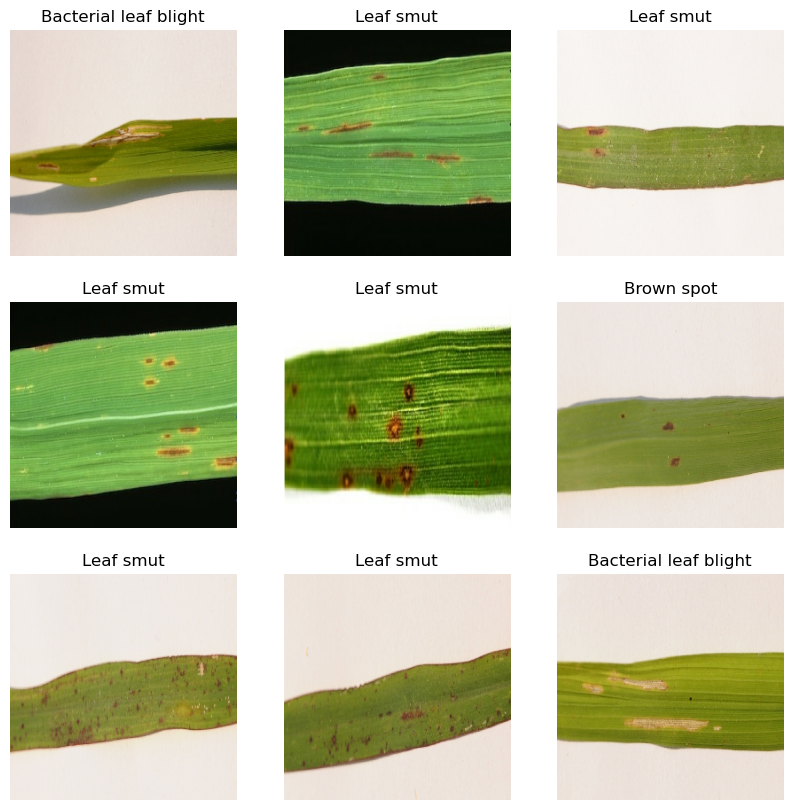

In [31]:
#here we give size of image that display below
plt.figure(figsize=(10, 10))

#Iterate over the dataset and retrieve one batch of images and their labels
for image_batch, labels_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)# display 9 iamges at time,if u not using thing cmmnd then only one imge will display
        plt.imshow(image_batch[i].numpy().astype("uint8"))#converting it to a NumPy array & specifying the data type as 8-bit integer
        plt.title(class_names[labels_batch[i]]) #help to display class of img
        plt.axis("off")#to hide axis in subplot

<h2 style="color:purple">Function to Split Dataset</h2>

Dataset should be bifurcated into 3 subsets, namely:

<b> 1.Training:</b> Dataset to be used while training

<b> 2. Validation:</b> Dataset to be tested against while training

<b> 3. Test:</b> Dataset to be tested against after we trained a model

In [32]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [33]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

<h2 style="color:purple">Cache, Shuffle, and Prefetch the Dataset</h2>

These techniques improve the efficiency of data loading, randomize the order of the data, and ensure a smooth and uninterrupted training process. As a result, they contribute to faster and more effective model training, validation, and testing.

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<h2 style="color:purple">Building the Model</h2>

we use the Keras preprocessing layers to `resize` our images to a consistent shape , and to `rescale` pixel values.

In [35]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

<h2 style="color:purple">Data Augmentation</h2>
 
 
`Data Augmentation` is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [36]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

<h2 style="color:purple">Applying Data Augmentation to Train Dataset</h2>

In [37]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



<h2 style="color:purple"> Model Architecture</h2>

We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [38]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

<h2 style="color:purple"> Compiling the Model</h2>

We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric


In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [41]:

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
3/3 [==============================] - 5s 878ms/step - loss: 1.1005 - accuracy: 0.3563
Epoch 2/50
3/3 [==============================] - 3s 825ms/step - loss: 1.0923 - accuracy: 0.3908
Epoch 3/50
3/3 [==============================] - 3s 845ms/step - loss: 1.0814 - accuracy: 0.3678
Epoch 4/50
3/3 [==============================] - 3s 973ms/step - loss: 1.0670 - accuracy: 0.4138
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 1.0508 - accuracy: 0.5057
Epoch 6/50
3/3 [==============================] - 3s 943ms/step - loss: 1.0359 - accuracy: 0.4713
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 1.0332 - accuracy: 0.4713
Epoch 8/50
3/3 [==============================] - 3s 973ms/step - loss: 1.0172 - accuracy: 0.4368
Epoch 9/50
3/3 [==============================] - 3s 1s/step - loss: 1.0091 - accuracy: 0.5057
Epoch 10/50
3/3 [==============================] - 4s 1s/step - loss: 0.9844 - accuracy: 0.5057
Epoch 11/50
3/3 [==============

In [42]:
scores = model.evaluate(test_ds)

1/1 [==============================] - 1s 913ms/step - loss: 0.7146 - accuracy: 0.9375


**You can see above that we get 93% accuracy for our test dataset. This is considered to be a pretty good accuracy**

In [43]:
scores #Scores is just a list containing loss and accuracy value

[0.7146281003952026, 0.9375]

<b>Based on the provided accuracy values of 0.8966 during training and 0.9375 during testing, we can infer that the model is performing well and not overfitting. The model's accuracy on the testing dataset is slightly higher than its accuracy on the training dataset, which is generally a positive sign. This suggests that the model is generalizing well to unseen data.</b>

<h2 style="color:purple"> Plotting the Accuracy and Loss Curves</h2>

In [44]:
history

In [45]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 3}

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

**loss, accuracy are a python list containing values of loss, accuracy etc at the end of each epoch**

In [47]:
type(history.history['loss'])

list

In [48]:
len(history.history['loss'])

50

In [49]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.1004782915115356,
 1.092310905456543,
 1.0813568830490112,
 1.0669503211975098,
 1.0508109331130981]

<h2 style="color:purple"> Run prediction on a sample image</h2>

first image to predict
actual label: Brown spot
1/1 [==============================] - 0s 388ms/step
predicted label: Brown spot


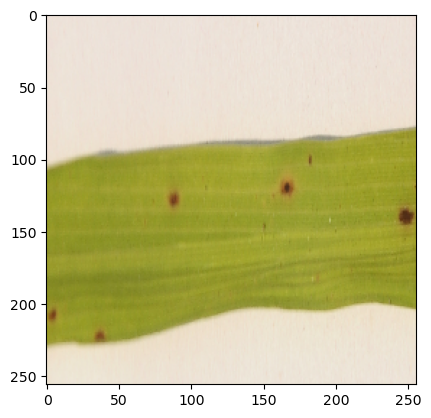

In [50]:

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]-)
    axis=["off"]

<h2 style="color:purple"> Write a function for inference</h2>

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 30ms/step


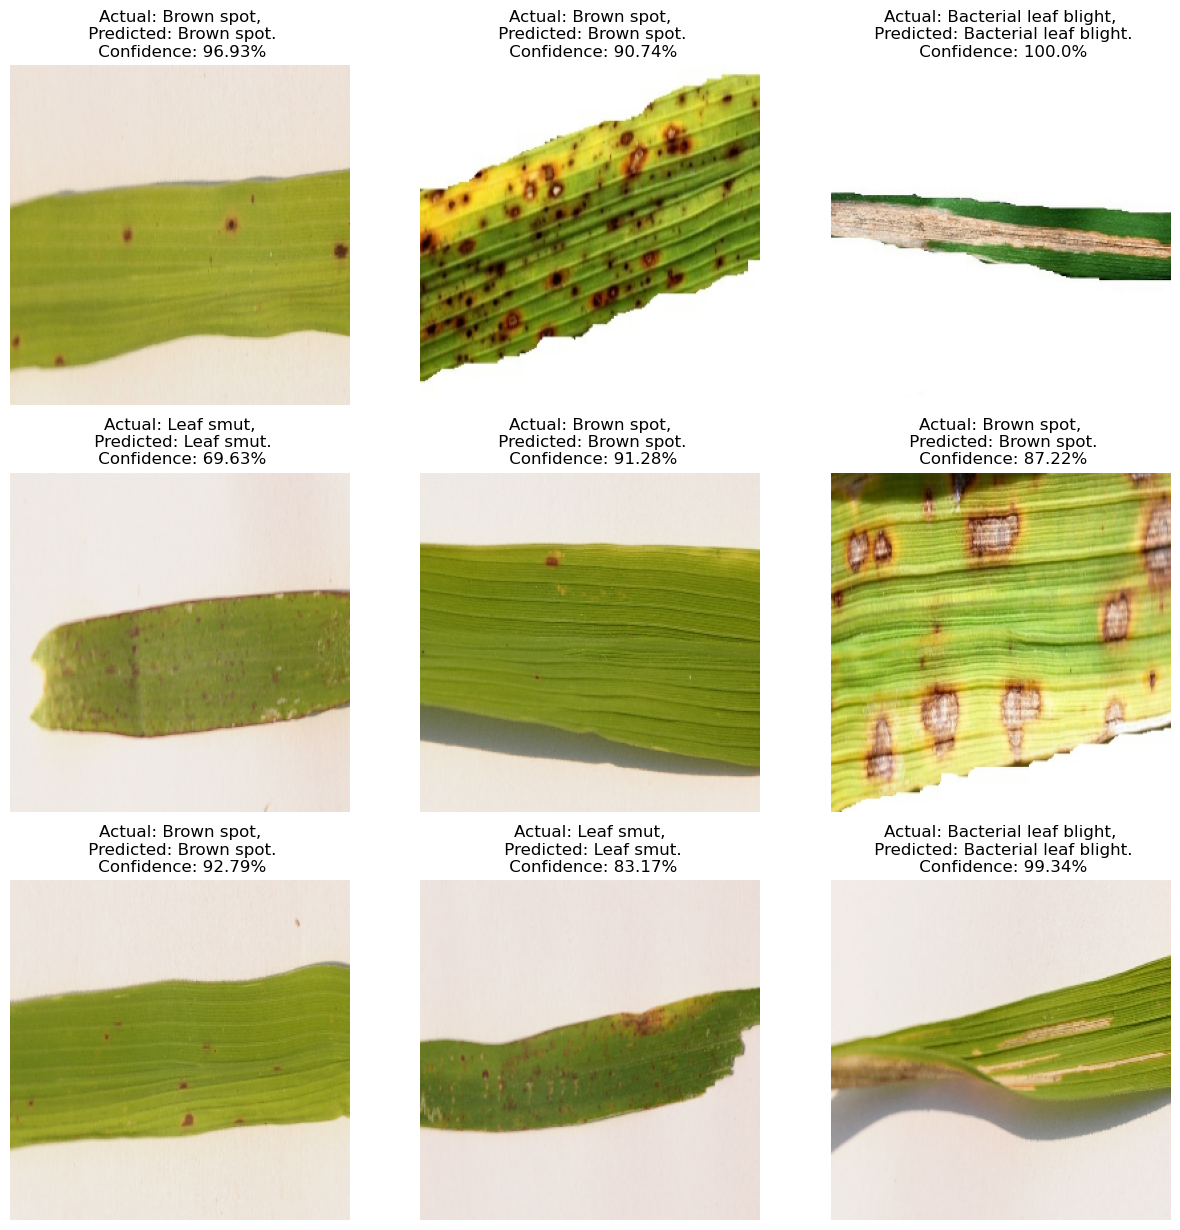

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

<h2 style="color:purple"> Conclusion</h2>

The PRCP-1001-Rice Leaf Disease Detection project successfully developed a disease classification model for rice plants with an impressive `accuracy` of `93.75%`.
The model's high accuracy demonstrates its effectiveness in accurately identifying and classifying leaf blast, bacterial blight, and brown spot diseases.

By providing farmers with a reliable tool for disease detection, the project aims to enhance crop productivity, promote sustainable agriculture practices, and minimize yield losses caused by these diseases.
Further research and validation on larger datasets can contribute to refining the model and expanding its application in real-world agricultural settings.